In [1]:
import gym
import numpy as np

env = gym.make('FrozenLake-v0')

#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
    
print("Score over time: " +  str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)

Score over time: 0.5905
Final Q-Table Values
[[  3.68948794e-01   7.91122526e-03   9.59731365e-03   1.02779087e-02]
 [  9.55566230e-05   2.61311298e-03   1.35639974e-03   3.65959899e-01]
 [  2.35121407e-01   7.90069430e-03   6.59260639e-03   8.15202992e-03]
 [  6.50186028e-04   4.96057749e-04   4.68483946e-04   7.88222214e-03]
 [  3.81941939e-01   1.11854559e-03   4.94707530e-04   4.30850201e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.60786303e-02   2.06142019e-06   6.84688771e-05   3.05456936e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.45381421e-04   3.87851682e-04   1.05983774e-04   3.23067978e-01]
 [  0.00000000e+00   1.92008424e-01   0.00000000e+00   6.08832416e-03]
 [  2.51374956e-01   1.11608311e-03   1.93317870e-03   1.03544138e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e

a: 
[2]
allQ: 
[[ 0.00309126  0.00357311  0.00987601  0.00348995]]
Q1: 
[[ 0.00309126  0.00357311  0.00987601  0.00348995]]
a: 
[2]
allQ: 
[[ 0.00309126  0.00357311  0.00985625  0.00348995]]
Q1: 
[[ 0.00309126  0.00357311  0.00985625  0.00348995]]
a: 
[2]
allQ: 
[[ 0.00309126  0.00357311  0.00983654  0.00348995]]
Q1: 
[[ 0.00963196  0.00483915  0.00252268  0.00755563]]
a: 
[0]
allQ: 
[[ 0.00963196  0.00483915  0.00252268  0.00755563]]
Q1: 
[[  7.49934884e-03   5.56243304e-03   5.90646268e-05   8.63968488e-03]]
a: 
[3]
allQ: 
[[  7.49934884e-03   5.56243304e-03   5.90646268e-05   8.63968488e-03]]
Q1: 
[[  7.49934884e-03   5.56243304e-03   5.90646268e-05   8.63968488e-03]]
a: 
[3]
allQ: 
[[  7.49934884e-03   5.56243304e-03   5.90646268e-05   8.62240512e-03]]
Q1: 
[[ 0.00941623  0.00483915  0.00252268  0.00755563]]
a: 
[0]
allQ: 
[[ 0.00941623  0.00483915  0.00252268  0.00755563]]
Q1: 
[[ 0.00309126  0.00357311  0.00977636  0.00348995]]
a: 
[2]
allQ: 
[[ 0.00309126  0.00357311  0.00977636

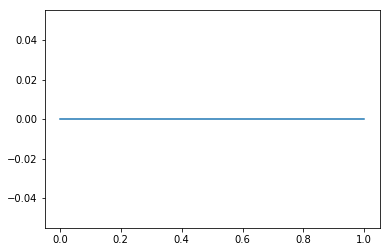

In [10]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


env = gym.make('FrozenLake-v0')

tf.reset_default_graph()

#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)


init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            print('a: ')
            print(a)
            print('allQ: ')
            print(allQ)
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            print('Q1: ')
            print(Q1)
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

plt.plot(rList)

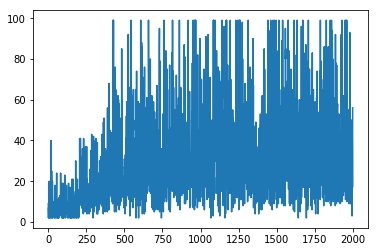

In [4]:
plt.plot(jList)

In [7]:
np.identity(16)[15:16]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]])